**Core question:** Are simpler words more commonly used than less simple words? 

**Proxy for simplicity:** Number of syllables in a word

In [1]:
# Importing Libraries 

import pandas as pd
import nltk
from nltk.corpus import cmudict
import string


In [2]:
# Import simple syllable library and dictionary 

d = cmudict.dict()
def nsyl(word):
  return [len(list(y for y in x if y[-1].isdigit())) for x in d[str(word).lower()]] 

In [3]:
# Reading in SUBTLEX Frequencies

freq_data1 = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word1","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil1","Log_Freq_Per_Mil1","SUBTLCD","Lg10CD"])
freq_data1 = freq_data1[["Word1","Freq_Per_Mil1","Log_Freq_Per_Mil1"]]

freq_data2 = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word2","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil2","Log_Freq_Per_Mil2","SUBTLCD","Lg10CD"])
freq_data2 = freq_data2[["Word2","Freq_Per_Mil2","Log_Freq_Per_Mil2"]]


In [4]:
# Reading in synonym dataframe from eacl2017
data=pd.read_csv("eacl2017/adjtrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])

# Filtering out antonyms
data = data[data.Synonym != 1]
data = data[["Word1", "Word2"]]

# Adding column for syllables 
data["Word1_Syll"] = ""
data["Word2_Syll"] = ""
data["Word1_Length"] = ""
data["Word2_Length"] = ""

for index, row in data.iterrows():
    row["Word1_Syll"] = nsyl(row["Word1"])[0]
    row["Word2_Syll"] = nsyl(row["Word2"])[0]
    row["Word1_Length"] = len(str(row["Word1"]))
    row["Word2_Length"] = len(str(row["Word2"]))

result = pd.merge(data,freq_data1,on="Word1")
final_df = pd.merge(result,freq_data2,on="Word2")

In [5]:
final_df['Syll_Delta'] = final_df['Word1_Syll'] - final_df['Word2_Syll']
final_df['Freq_Delta'] = final_df['Log_Freq_Per_Mil1'] - final_df['Log_Freq_Per_Mil2']
final_df['Length_Delta'] = final_df['Word1_Length'] - final_df['Word2_Length']

final_df

,Word1,Word2,Word1_Syll,Word2_Syll,Word1_Length,Word2_Length,Freq_Per_Mil1,Log_Freq_Per_Mil1,Freq_Per_Mil2,Log_Freq_Per_Mil2,Syll_Delta,Freq_Delta,Length_Delta
0,precipitous,steep,4,1,11,5,0.12,0.8451,2.45,2.1004,3,-1.2553,6
1,abrupt,steep,2,1,6,5,1.14,1.7709,2.45,2.1004,1,-0.3295,1
2,mystical,mysterious,3,4,8,10,2.82,2.1614,15.00,2.8842,-1,-0.7228,-2
3,dim,mysterious,1,4,3,10,4.76,2.3874,15.00,2.8842,-3,-0.4968,-7
4,secret,mysterious,2,4,6,10,109.51,3.7471,15.00,2.8842,-2,0.8629,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,ruinous,decayed,3,2,7,7,0.10,0.7782,0.22,1.0792,1,-0.3010,0
2491,inert,lifeless,2,2,5,8,0.35,1.2788,1.25,1.8129,0,-0.5341,-3
2492,intentional,willful,4,2,11,7,1.47,1.8808,0.69,1.5563,2,0.3245,4
2493,missing,absent,2,2,7,6,87.92,3.6518,2.57,2.1206,0,1.5312,1


In [7]:
#Calculate correlations 

final_df = final_df.astype({'Syll_Delta':'float','Freq_Delta':'float','Length_Delta':'float'})

corr_length = final_df["Freq_Delta"].corr(final_df["Length_Delta"])
print("the correlation between frequency and word length delta is", corr_length)

corr_length = final_df["Freq_Delta"].corr(final_df["Syll_Delta"])
print("the correlation between frequency and syllable delta is", corr_length)

the correlation between frequency and word length delta is -0.5830810874347246
the correlation between frequency and syllable delta is -0.5513596631648194


In [10]:
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

<Axes: xlabel='Freq_Delta', ylabel='Syll_Delta'>

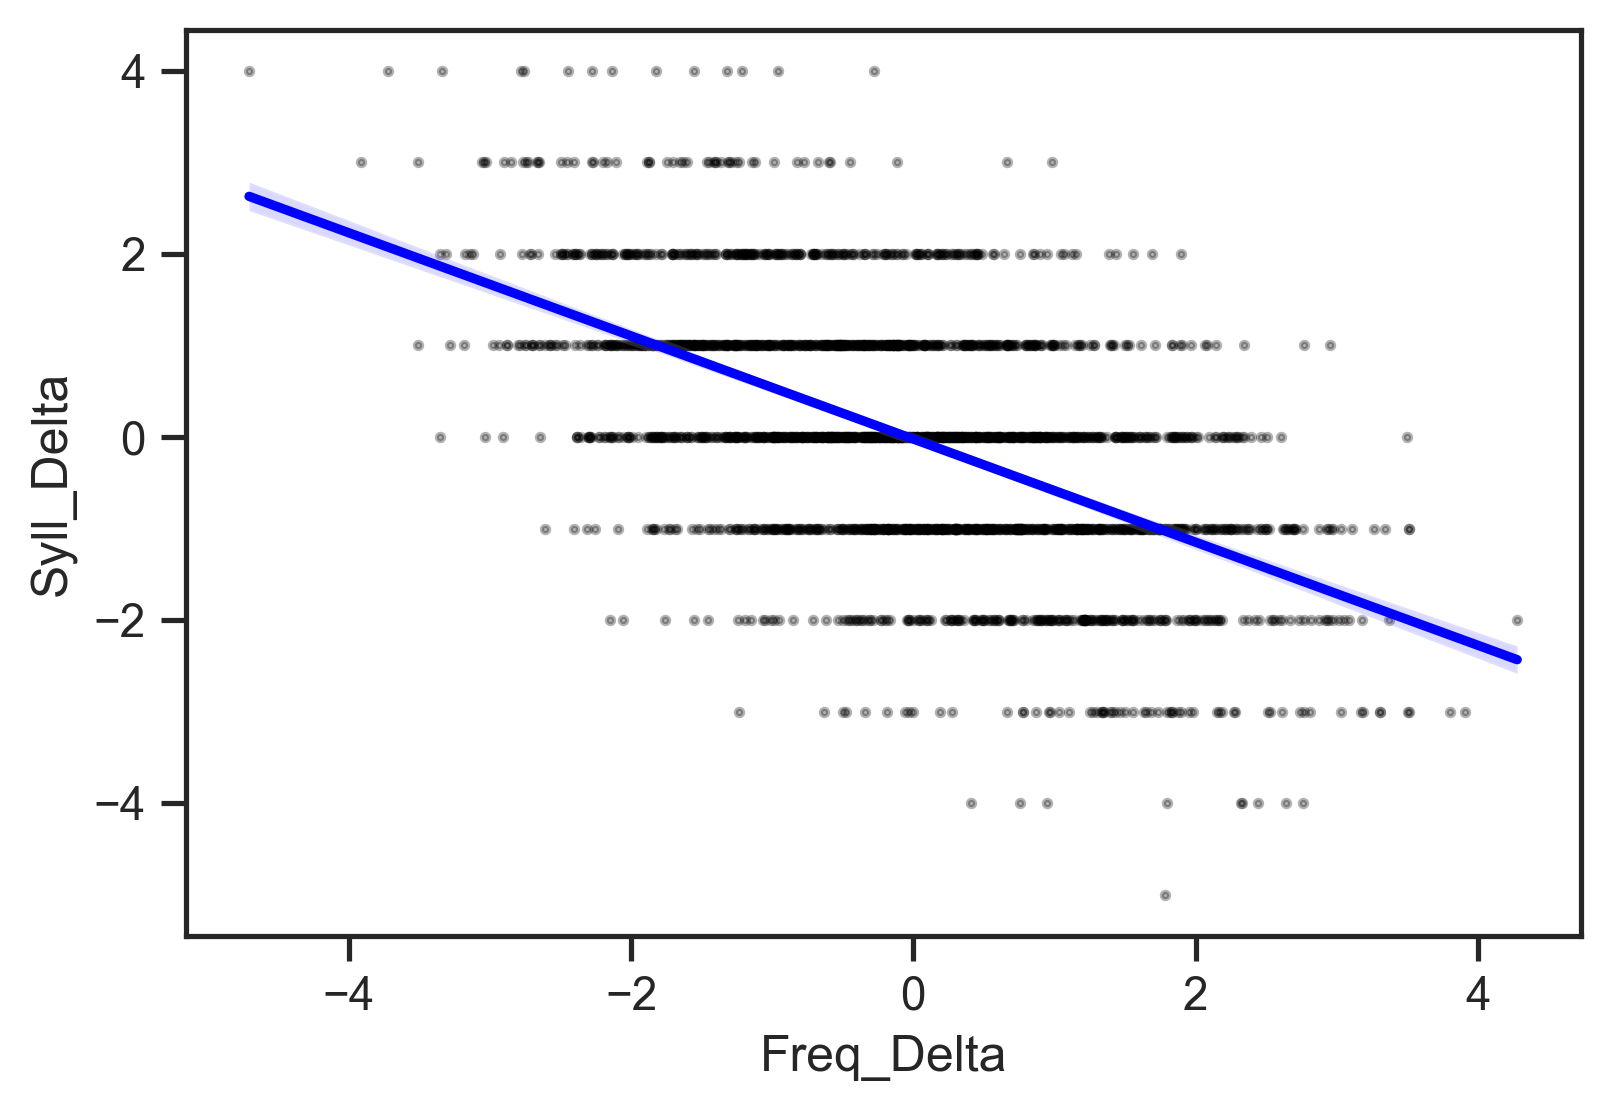

In [11]:
sns.regplot(x = final_df["Freq_Delta"], y = final_df["Syll_Delta"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':3},
            line_kws = {"color": "blue"},
            ci = 95) 

<Axes: xlabel='Freq_Delta', ylabel='Length_Delta'>

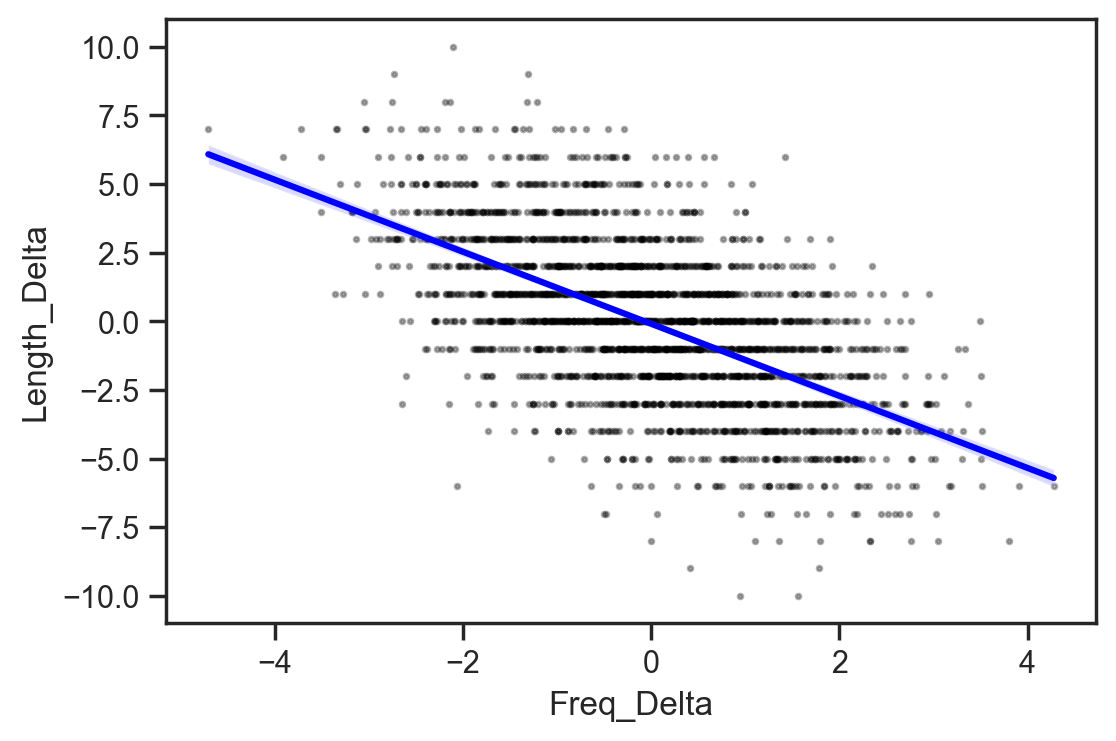

In [310]:
sns.regplot(x = final_df["Freq_Delta"], y = final_df["Length_Delta"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':3},
            line_kws = {"color": "blue"},
            ci = 95) 